In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
movies=pd.read_csv(r"/content/movies_metadata.csv",low_memory=False)
ratings=pd.read_csv(r"/content/ratings.csv",low_memory=False)

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1.425942e+09
1,1,147,4.5,1.425942e+09
2,1,858,5.0,1.425942e+09
3,1,1221,5.0,1.425942e+09
4,1,1246,5.0,1.425942e+09


In [ ]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11374933 entries, 0 to 11374932
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  float64
dtypes: float64(2), int64(2)
memory usage: 347.1 MB


In [ ]:
movies=movies[["id","title","genres"]]

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45463 non-null  float64
 1   title    45460 non-null  object 
 2   genres   45466 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.0+ MB


In [ ]:
movies.columns=["movieId","title","genres"]

In [ ]:
movies["movieId"]=pd.to_numeric(movies["movieId"], errors="coerce")

In [ ]:
ratings.describe()

,userId,movieId,rating,timestamp
count,3.696279e+06,3.696278e+06,3.696278e+06,3.696278e+06
mean,1.917543e+04,1.582293e+04,3.529692e+00,1.171334e+09
std,1.113829e+04,3.101156e+04,1.057100e+00,2.052443e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,9.436000e+03,1.073000e+03,3.000000e+00,9.888566e+08
50%,1.914800e+04,2.581000e+03,3.500000e+00,1.152546e+09
75%,2.877100e+04,6.483000e+03,4.000000e+00,1.357714e+09
max,3.850000e+04,1.762710e+05,5.000000e+00,1.501822e+09


In [ ]:
movies.describe()

,movieId
count,45463.000000
mean,108359.918813
std,112460.749278
min,2.000000
25%,26449.500000
50%,60003.000000
75%,157328.000000
max,469172.000000


Text(0, 0.5, 'Counts')

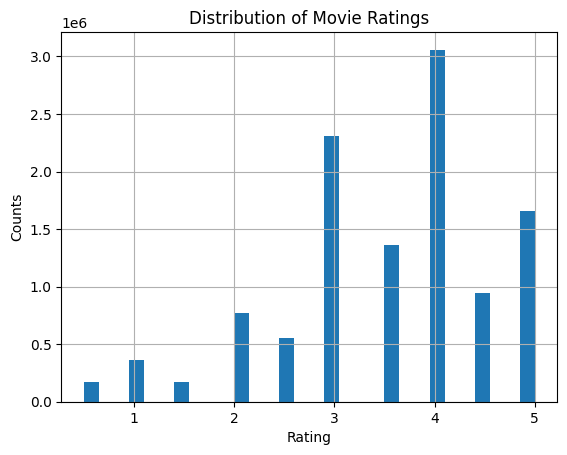

In [ ]:
ratings["rating"].hist(bins=30)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Counts")

In [ ]:
ratings_per_movie=ratings.groupby("movieId").count()["rating"]

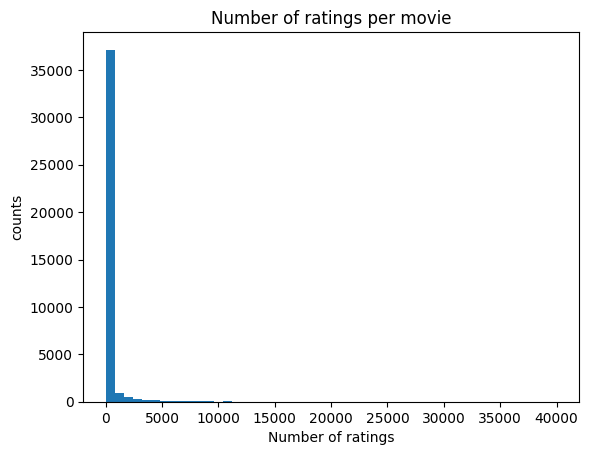

In [ ]:
plt.hist(ratings_per_movie,bins=50)
plt.title("Number of ratings per movie")
plt.xlabel("Number of ratings")
plt.ylabel("counts")
plt.show()

In [ ]:
!pip install scikit-surprise
# install the missing package 'scikit-surprise' using pip

from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
# import necessary modules from the package

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357283 sha256=ca83bfbac47bf29d8bd55f0078da0ed5729f9f02f7a44bf6542e0b966eb0d64f
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
from surprise.model_selection import cross_validate

In [ ]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
# Use SVD for matrix factorization
svd = SVD()
# Cross-validation to evaluate the algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.8157  1.8157  1.8160  nan     1.8158  nan     nan     
MAE (testset)     1.4725  1.4724  1.4725  nan     1.4728  nan     nan     
Fit time          139.94  149.08  149.38  148.39  149.22  147.20  3.64    
Test time         31.25   34.19   27.39   29.17   31.92   30.79   2.34    


{'test_rmse': array([1.81571805, 1.81566113, 1.81597204,        nan, 1.81583685]),
 'test_mae': array([1.4724616 , 1.47241786, 1.47251611,        nan, 1.47284225]),
 'fit_time': (139.94329977035522,
  149.08037996292114,
  149.37700939178467,
  148.3905131816864,
  149.21663331985474),
 'test_time': (31.25443124771118,
  34.19177532196045,
  27.387585163116455,
  29.16773223876953,
  31.924606800079346)}

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
# Predict the rating for a specific user and movie
user_id = 1
movie_id = 10
rating_prediction = svd.predict(user_id, movie_id)
print(f"Predicted rating for user {user_id} and movie {movie_id}: {rating_prediction.est}")

Predicted rating for user 1 and movie 10: 5


In [ ]:
# Function to recommend top N movies for a given user
def recommend_movies(user_id, num_recommendations=10):
  movie_ids = movies['movieId'].unique()
  # Predict ratings for all movies the user hasn't rated yet
  movie_ratings = [svd.predict(user_id, movie_id).est for movie_id in movie_ids]
  # Create a DataFrame of movie ids and predicted ratings
  recommendations = pd.DataFrame({
      'movieId': movie_ids,
      'predicted_rating': movie_ratings
      })
        # Sort the DataFrame by predicted rating in descending order
  recommendations = recommendations.sort_values(by='predicted_rating',
                                                ascending=False)
      # Get the top N recommended movies
  top_recommendations = recommendations.head(num_recommendations)
        # Merge with the movies DataFrame to get movie titles
  top_recommendations = pd.merge(top_recommendations, movies, on='movieId')
  return top_recommendations
# Recommend top 10 movies for user with ID 1
recommendations = recommend_movies(1, 10)
print(recommendations)

    movieId  predicted_rating                        title  \
0  461257.0                 5                     Queerama   
1     862.0                 5                    Toy Story   
2    8844.0                 5                      Jumanji   
3   15602.0                 5             Grumpier Old Men   
4   31357.0                 5            Waiting to Exhale   
5   11862.0                 5  Father of the Bride Part II   
6     949.0                 5                         Heat   
7   11860.0                 5                      Sabrina   
8   45325.0                 5                 Tom and Huck   
9    9091.0                 5                 Sudden Death   

                                              genres  
0                                                 []  
1  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...  
2  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...  
3  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...  
4  [{'id': 35, 'name': 'Comedy'}, {'id': 1